# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ferdian Sakti
- **Email:** ferdian@smkdb1jombang.sch.id
- **ID Dicoding:** ferdian_sakti

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola penyewaan sepeda bervariasi antara pengguna kasual (biasa) dan terdaftar?
2. Apakah ada waktu dan musim tertentu dimana permintaan sepeda lebih tinggi atau lebih rendah?
3. Bagaimana pengaruh suhu, kelembapan, dan kecepatan angin terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [118]:
# Mengimpor pustaka yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [119]:
# Memuat dataset
data_sepeda = pd.read_csv('/content/sample_data/hour.csv')

In [120]:
# Menampilkan beberapa baris pertama dataset
print(data_sepeda.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [121]:
# Memeriksa dimensi dataset
print("Ukuran dataset:", data_sepeda.shape)

Ukuran dataset: (17379, 17)


**Insight:**
- Dataset berupa file csv dengan nama file hour.csv untuk dianalisis.
- Dataset memiliki 17.379 baris dan 17 kolom.

### Assessing Data

In [122]:
# Menampilkan ringkasan dataset
print(data_sepeda.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [123]:
# Memeriksa nilai yang hilang
print("Nilai yang hilang:\n", data_sepeda.isna().sum())

Nilai yang hilang:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [124]:
# Memeriksa baris yang duplikat
print("Jumlah baris duplikat:", data_sepeda.duplicated().sum())

Jumlah baris duplikat: 0


**Insight:**
- Tidak terdapat missing value dan duplikat value pada dataset yang diimpor.
- Dataset memiliki 4 kolom bertipe float64, 12 kolom bertipe int64, dan
1 kolom bertipe object, yang biasanya berisi teks atau kategori.

### Cleaning Data

In [125]:
# Menghapus kolom yang tidak diperlukan
data_sepeda.drop(['instant', 'dteday'], axis=1, inplace=True)

In [126]:
# Mengubah kolom 'season' menjadi kategori
peta_musim = {1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'}
data_sepeda['season'] = data_sepeda['season'].map(peta_musim)

In [127]:
# Mengubah kolom 'mnth' menjadi kategori
peta_bulan = {1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
              7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'}
data_sepeda['mnth'] = data_sepeda['mnth'].map(peta_bulan)

In [128]:
# Mengubah kolom 'weekday' menjadi kategori
peta_hari = {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu',
             4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}
data_sepeda['weekday'] = data_sepeda['weekday'].map(peta_hari)

In [129]:
# Kategorisasi suhu
temp_bins = np.linspace(data_sepeda['temp'].min(), data_sepeda['temp'].max(), 4)
temp_labels = ['Dingin', 'Sedang', 'Panas']
data_sepeda['kategori_suhu'] = pd.cut(data_sepeda['temp'], bins=temp_bins, labels=temp_labels)

In [130]:
# Kategorisasi kelembapan
humidity_bins = np.linspace(data_sepeda['hum'].min(), data_sepeda['hum'].max(), 4)
humidity_labels = ['Rendah', 'Sedang', 'Tinggi']
data_sepeda['kategori_kelembapan'] = pd.cut(data_sepeda['hum'], bins=humidity_bins, labels=humidity_labels)

In [131]:
# Kategorisasi kecepatan angin
wind_bins = np.linspace(data_sepeda['windspeed'].min(), data_sepeda['windspeed'].max(), 4)
wind_labels = ['Tenang', 'Sejuk', 'Berangin']
data_sepeda['kategori_angin'] = pd.cut(data_sepeda['windspeed'], bins=wind_bins, labels=wind_labels)

In [132]:
# Kategorisasi waktu dalam sehari
jam_bins = [0, 6, 12, 18, 24]
jam_labels = ['Dini Hari', 'Pagi', 'Siang', 'Malam']
data_sepeda['waktu_hari'] = pd.cut(data_sepeda['hr'], bins=jam_bins, labels=jam_labels, right=False)

In [133]:
# Kategorisasi jumlah penyewaan sepeda
rental_bins = np.linspace(data_sepeda['cnt'].min(), data_sepeda['cnt'].max(), 4)
rental_labels = ['Rendah', 'Sedang', 'Tinggi']
data_sepeda['kategori_sewa'] = pd.cut(data_sepeda['cnt'], bins=rental_bins, labels=rental_labels)

In [134]:
# Simpan DataFrame ke file CSV
data_sepeda.to_csv('data_sepeda_cleaned.csv', index=False)

**Insight:**
- Mengubah data numerik menjadi kategori pada variabel musim.
- Membantu eksplorasi dengan mengubah variabel kontinu menjadi kategori.

## Exploratory Data Analysis (EDA)

### Explore ...

In [135]:
# Menampilkan statistik dasar untuk variabel kontinu
print(data_sepeda[['casual', 'registered', 'cnt']].describe())

             casual    registered           cnt
count  17379.000000  17379.000000  17379.000000
mean      35.676218    153.786869    189.463088
std       49.305030    151.357286    181.387599
min        0.000000      0.000000      1.000000
25%        4.000000     34.000000     40.000000
50%       17.000000    115.000000    142.000000
75%       48.000000    220.000000    281.000000
max      367.000000    886.000000    977.000000


In [136]:
# Menampilkan jumlah kategori pada variabel kategorikal
kolom_kategorikal = ['season', 'yr', 'mnth', 'weekday', 'weathersit', 'kategori_suhu',
                     'kategori_angin', 'kategori_kelembapan', 'waktu_hari', 'kategori_sewa']
for kolom in kolom_kategorikal:
    print(f"Jumlah nilai untuk {kolom}:\n{data_sepeda[kolom].value_counts()}\n")

Jumlah nilai untuk season:
season
Gugur     4496
Panas     4409
Semi      4242
Dingin    4232
Name: count, dtype: int64

Jumlah nilai untuk yr:
yr
1    8734
0    8645
Name: count, dtype: int64

Jumlah nilai untuk mnth:
mnth
Mei          1488
Juli         1488
Desember     1483
Agustus      1475
Maret        1473
Oktober      1451
Juni         1440
April        1437
September    1437
November     1437
Januari      1429
Februari     1341
Name: count, dtype: int64

Jumlah nilai untuk weekday:
weekday
Sabtu     2512
Minggu    2502
Jumat     2487
Senin     2479
Rabu      2475
Kamis     2471
Selasa    2453
Name: count, dtype: int64

Jumlah nilai untuk weathersit:
weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

Jumlah nilai untuk kategori_suhu:
kategori_suhu
Sedang    8885
Dingin    4753
Panas     3724
Name: count, dtype: int64

Jumlah nilai untuk kategori_angin:
kategori_angin
Tenang      10940
Sejuk        4152
Berangin      107
Name: count, dtype: int64

J

In [137]:
# Menampilkan modus dari variabel kategorikal
modus_nilai = data_sepeda[kolom_kategorikal].mode().iloc[0]
print("Modus untuk variabel kategorikal:\n", modus_nilai)

Modus untuk variabel kategorikal:
 season                  Gugur
yr                        1.0
mnth                     Juli
weekday                 Sabtu
weathersit                1.0
kategori_suhu          Sedang
kategori_angin         Tenang
kategori_kelembapan    Sedang
waktu_hari              Siang
kategori_sewa          Rendah
Name: 0, dtype: object


**Insight:**
- Persentase pengguna terdaftar (registered) lebih tinggi dibandingkan pengguna kasual (casual) di setiap musim.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
1. Bagaimana pola penggunaan sepeda berbeda antara pengguna kasual dan pengguna terdaftar dalam sehari?
2. Bagaimana pola penggunaan sepeda antara pengguna kasual dan pengguna terdaftar dalam seminggu?
3. Bagaimana pola penggunaan sepeda antara pengguna kasual dan pengguna terdaftar dalam setahun?
4. Bagaimana pola penggunaan sepeda pengguna kasual dan terdaftar pada musim sepanjang tahun?


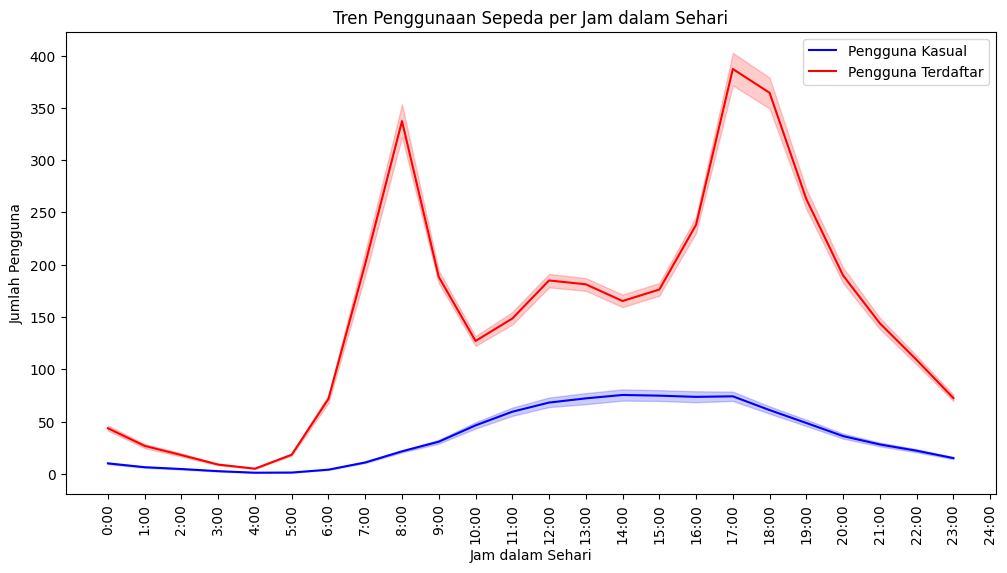

In [138]:
# Tren penggunaan sepeda per jam dalam sehari
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_sepeda, x='hr', y='casual', label='Pengguna Kasual', color='blue')
sns.lineplot(data=data_sepeda, x='hr', y='registered', label='Pengguna Terdaftar', color='red')
plt.title('Tren Penggunaan Sepeda per Jam dalam Sehari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Pengguna')
plt.xticks(ticks=range(0, 25, 1), labels=[f"{i}:00" for i in range(0, 25, 1)], rotation=90)
plt.legend()
plt.show()

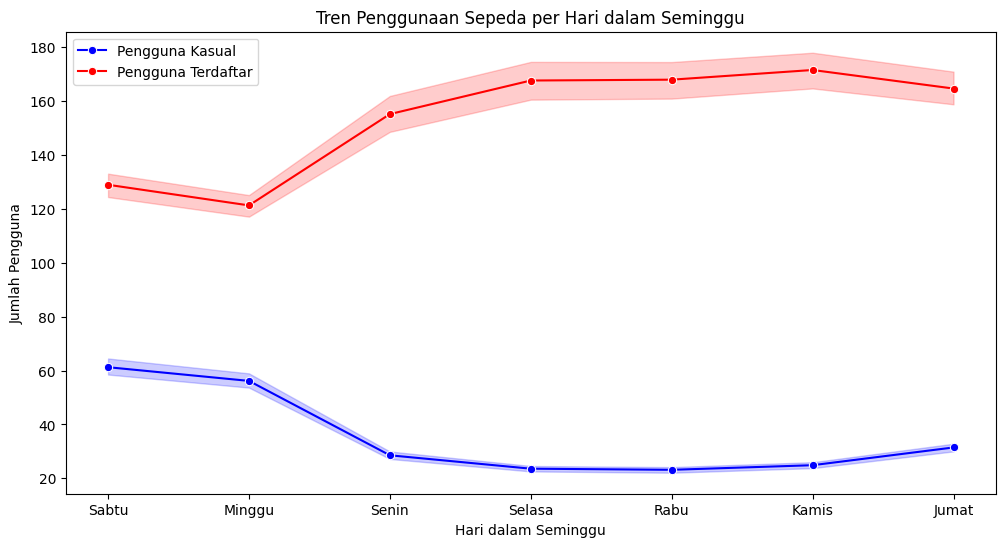

In [139]:
# Tren penggunaan sepeda per hari dalam seminggu
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_sepeda, x='weekday', y='casual', marker='o', label='Pengguna Kasual', color='blue')
sns.lineplot(data=data_sepeda, x='weekday', y='registered', marker='o', label='Pengguna Terdaftar', color='red')
plt.title('Tren Penggunaan Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Pengguna')
plt.legend()
plt.show()

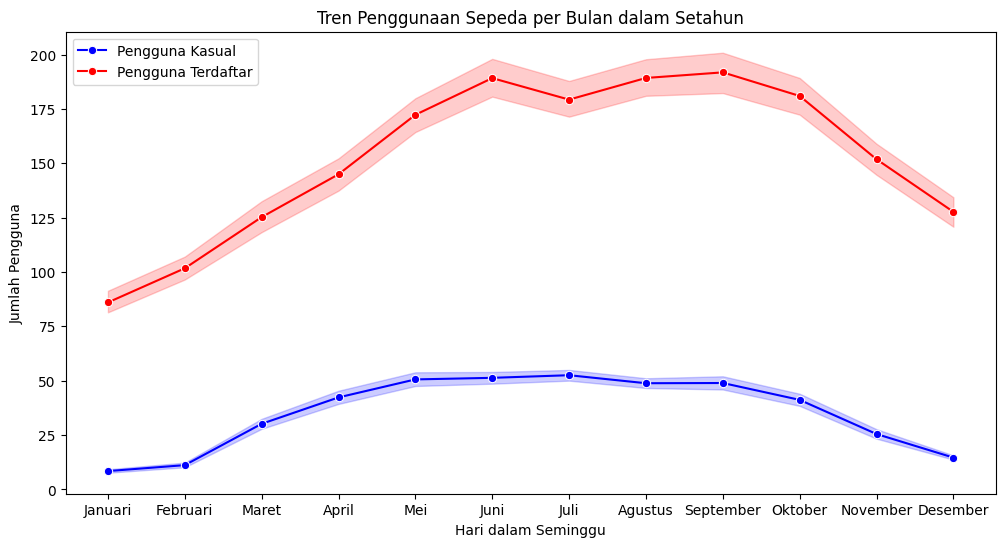

In [140]:
# Tren penggunaan sepeda per bulan dalam setahun
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_sepeda, x='mnth', y='casual', marker='o', label='Pengguna Kasual', color='blue')
sns.lineplot(data=data_sepeda, x='mnth', y='registered', marker='o', label='Pengguna Terdaftar', color='red')
plt.title('Tren Penggunaan Sepeda per Bulan dalam Setahun')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Pengguna')
plt.legend()
plt.show()

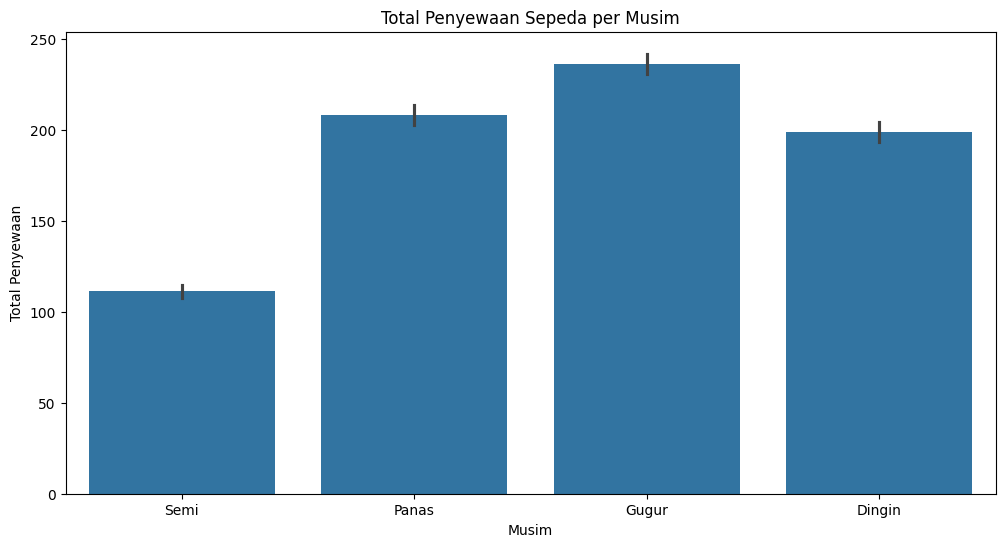

In [141]:
# Visualisasi total penyewaan sepeda per musim
plt.figure(figsize=(12, 6))
sns.barplot(data=data_sepeda, x='season', y='cnt')
plt.title('Total Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')
plt.show()

**Insight:**
- Pada jam 5 pagi sampai dengan pukul 10 siang dan pukul 15 sampai dengan pukul 20 penyewa sepeda mengalami kenaikan yang signifikan.
- Pada hari Senin-Jum'at (weekdays) penyewa sepeda mengalami kenaikan yang siginifikan dibanding dengan Hari Sabtu & Minggu (weekend).
- Penyewaan sepeda paling banyak pada bulan Juni sampai dengan September dan grafik dari pengguna kasual lebih stabil dibanding dengan pengguna terdaftar.
- Penyewaan sepeda paling banyak ada pada musim gugur, dan paling rendah di musim semi.

### Pertanyaan 2:
- Bagaimana pengaruh suhu terhadap penyewaan sepeda?
- Bagaimana pengaruh kelembapan terhadap penyewaan sepeda?
- Bagaimana pengaruh kecepatan angin terhadap penyewaan sepeda?

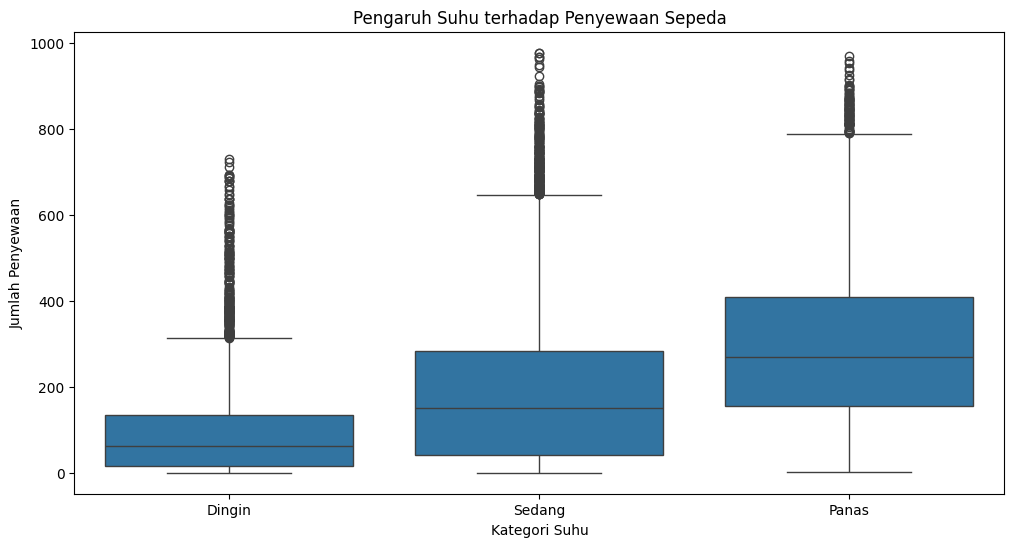

In [142]:
# Pengaruh suhu terhadap penyewaan sepeda
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_sepeda, x='kategori_suhu', y='cnt')
plt.title('Pengaruh Suhu terhadap Penyewaan Sepeda')
plt.xlabel('Kategori Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

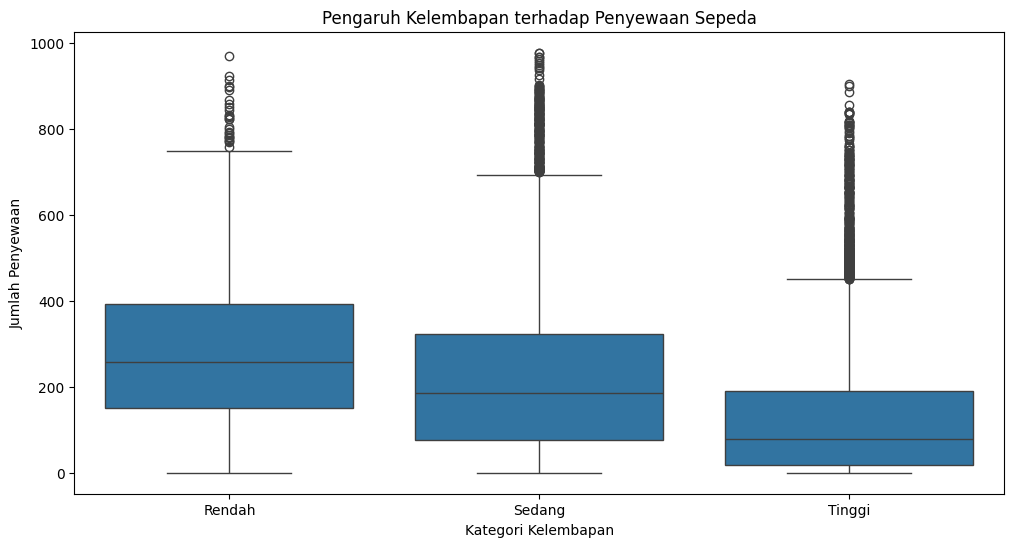

In [143]:
# Pengaruh kelembapan terhadap penyewaan sepeda
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_sepeda, x='kategori_kelembapan', y='cnt')
plt.title('Pengaruh Kelembapan terhadap Penyewaan Sepeda')
plt.xlabel('Kategori Kelembapan')
plt.ylabel('Jumlah Penyewaan')
plt.show()

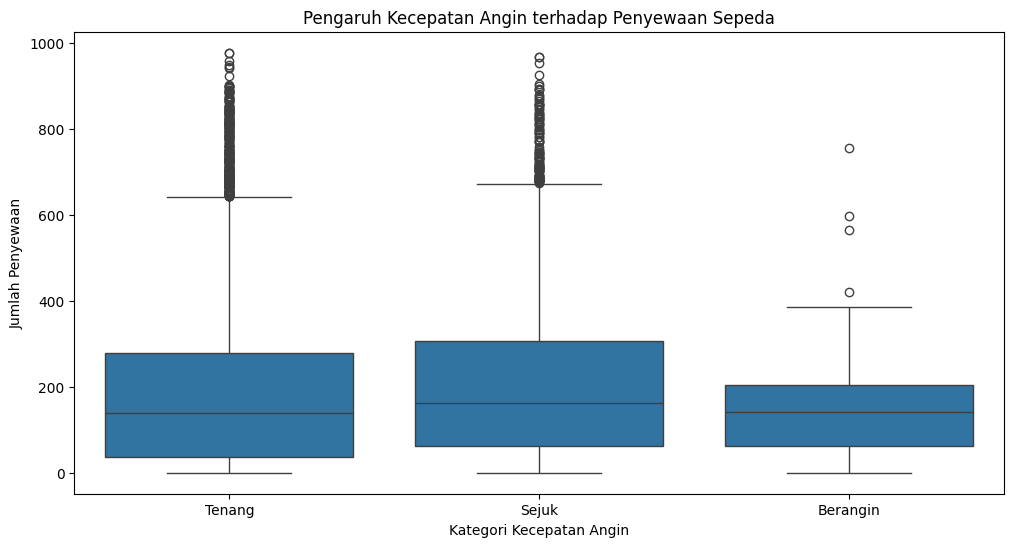

In [144]:
# Pengaruh kecepatan angin terhadap penyewaan sepeda
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_sepeda, x='kategori_angin', y='cnt')
plt.title('Pengaruh Kecepatan Angin terhadap Penyewaan Sepeda')
plt.xlabel('Kategori Kecepatan Angin')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Insight:
- Suhu yang lebih hangat (sedang dan panas) cenderung meningkatkan jumlah penyewaan sepeda.
- Jumlah penyewaan sepeda bisa sangat bervariasi, terutama pada suhu sedang.
- Kelembapan rendah dan sedang cenderung meningkatkan jumlah penyewaan sepeda dibandingkan kelembapan tinggi.
- Jumlah penyewaan sepeda bisa sangat bervariasi, terutama pada kelembapan sedang.
- Kecepatan angin tenang dan sejuk cenderung meningkatkan jumlah penyewaan sepeda dibandingkan berangin.
- Jumlah penyewaan sepeda bisa sangat bervariasi, terutama pada kecepatan angin sejuk.

## Analisis Lanjutan

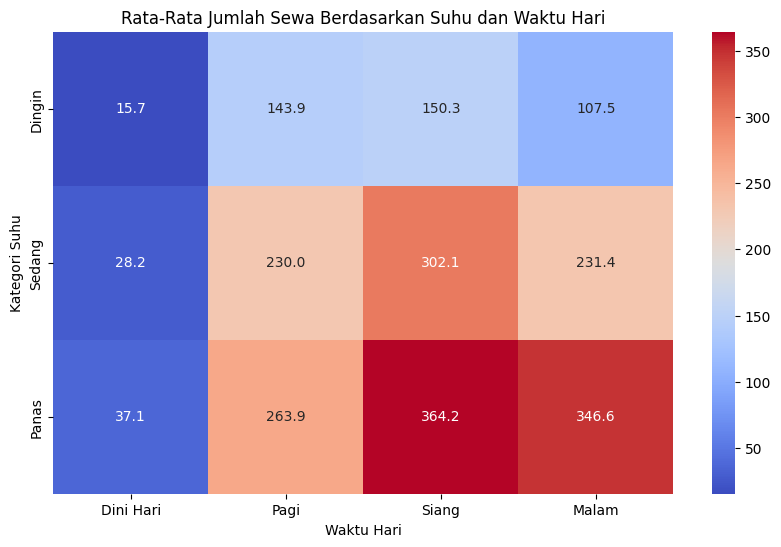

In [145]:
# Heatmap: Rata-rata jumlah sewa berdasarkan suhu dan waktu hari
pivot_table = data_sepeda.pivot_table(values='cnt', index='kategori_suhu', columns='waktu_hari', aggfunc='mean', observed=False)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Rata-Rata Jumlah Sewa Berdasarkan Suhu dan Waktu Hari')
plt.xlabel('Waktu Hari')
plt.ylabel('Kategori Suhu')
plt.show()

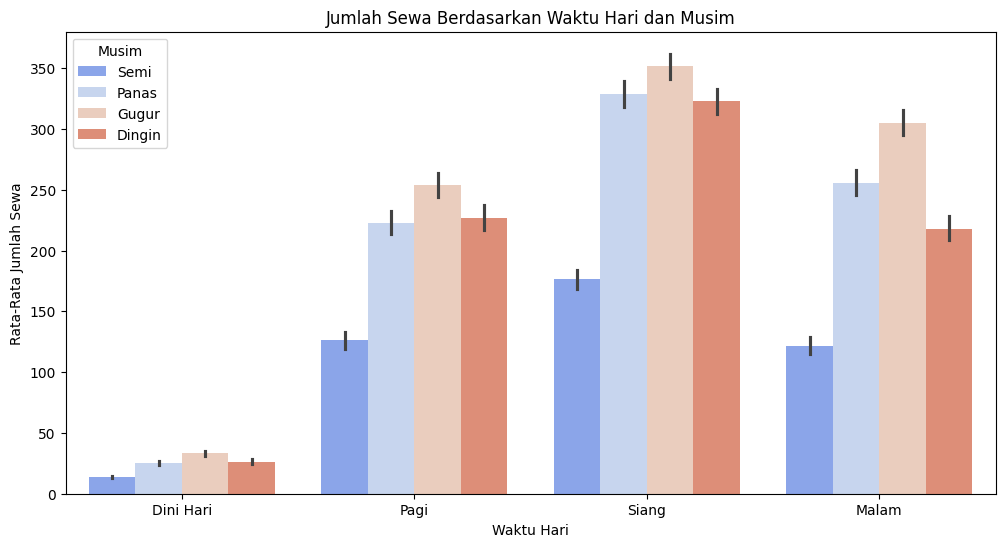

In [146]:
# Grouped bar plot: Jumlah sewa berdasarkan waktu hari dan musim
plt.figure(figsize=(12, 6))
sns.barplot(data=data_sepeda, x='waktu_hari', y='cnt', hue='season', palette='coolwarm', order=jam_labels)
plt.title('Jumlah Sewa Berdasarkan Waktu Hari dan Musim')
plt.xlabel('Waktu Hari')
plt.ylabel('Rata-Rata Jumlah Sewa')
plt.legend(title='Musim')
plt.show()

## Conclusion

1. Bagaimana pola variasi penyewaan sepeda antara pengguna kasual (biasa) dan terdaftar?
- Berdasarkan analisis tren harian, mingguan, dan musiman, pengguna terdaftar lebih sering menyewa sepeda dibanding pengguna kasual, terutama pada hari kerja dan jam sibuk. Hal ini menunjukkan bahwa sepeda lebih banyak digunakan sebagai transportasi harian oleh pengguna tetap.
2. Apakah ada waktu dan musim tertentu dimana permintaan sepeda lebih tinggi atau lebih rendah?
- Permintaan sepeda tertinggi terjadi di musim gugur, terutama pada siang dan malam hari, diikuti oleh musim panas. Sementara itu, permintaan lebih rendah terjadi di musim semi, terutama di pagi hari. Tren ini menunjukkan bahwa cuaca yang nyaman berperan besar dalam meningkatkan jumlah penyewaan.
3. Bagaimana pengaruh suhu, kelembapan, dan kecepatan angin terhadap jumlah penyewaan sepeda?
- Penyewaan sepeda meningkat pada suhu sedang, kelembapan rendah hingga sedang, serta kecepatan angin yang tenang dan sejuk. Sebaliknya, suhu panas, kelembapan tinggi, dan angin kencang cenderung menurunkan jumlah penyewaan.